# Statistical Power Assignment

In [1]:
import math

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import scipy.stats as sts

/Users/matthewdrury/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


In [2]:
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Part 1: Introduction to Power

### 1. Load the data in with `np.loadtxt('data/coke_weights.txt')`. Visualize the data with either a scatterplot (with jitter) or a histogram. Does it look like there is cause for concern?

In [3]:
coke_weights = np.loadtxt('./data/coke_weights.txt')
print(coke_weights.shape)

(130,)


Text(0.5,1,'Sample Distribution of Coke Weights')

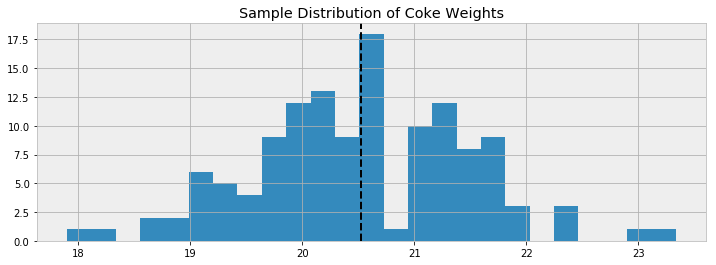

In [4]:
fig, ax = plt.subplots(figsize=(12, 4))

coke_mean = coke_weights.mean()
ax.hist(coke_weights, bins=25)
ax.axvline(coke_mean, color='black', linestyle='--')
ax.set_title("Sample Distribution of Coke Weights")

### 2. You would like to design a NHST that will notify you when bottles are being manufactured that systematically differ from 20.4 ounces. State a null hypothesis appropriate for the problem.

We have a prior belief that we are manufacturing bottles to specification, so we should hold onto this belief until presented with evidence otherwise.  This make our null hypothesis

$H_0$: The population mean weight of our manufactured bottles is 20.4 ounces.

Or more tersely

$$H_0: \mu_{\text{bottle weight}} = 20.4$$

### 3. State an alternate hypothesis. Is a one tailed or two tailed test appropriate for your goals?

Since we want to detect when our mean is simply *different* than the standard, this is most reasonably setup as a two tailed test.

$$H_0: \mu_{\text{bottle weight}} \neq 20.4$$

### 4. What is the distribution of your sample average under the null hypothesis assumption? What result tells you this?

According to the central limit theorem, the distribution of sample averages is approximately normally distributed.  Since we have a reasonably large sample (130), unless the population distribution of coke bottle weights is very skew, we should be safe to assume that this approximation is quite good.

Assuming the null hypothesis, we know the mean of this sampling distribution is 20.4 ounces.

Letting $\sigma$ denote the population standard deviation of coke bottle weights, the standard deviation of the sampling distribution is the standard error.  This means that the null distribution is:

$$ \text{Mean Coke Bottle Weight} \mid H_0 \sim N\left(20.4, \frac{\sigma}{\sqrt{130}}\right)$$

### 5. Use scipy to make a random variable of the sampling distribution of the mean under the null hypothesis. Plot the PDF over +/- 4 standard error.

In [5]:
coke_std_error = np.std(coke_weights) / np.sqrt(130)
h0_dist = sts.norm(loc=20.4, scale=coke_std_error)

Text(0.5,1,'$H_0$ Distribution of Coke Bottle Weights')

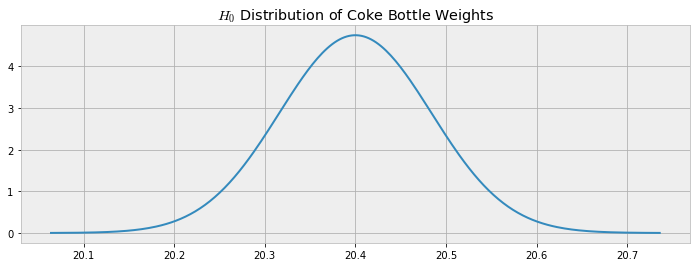

In [6]:
fig, ax = plt.subplots(figsize=(12, 4))

t = np.linspace(20.4 - 4*coke_std_error, 20.4 + 4*coke_std_error, num=250)
ax.plot(t, h0_dist.pdf(t))
ax.set_title("$H_0$ Distribution of Coke Bottle Weights")

### 5. According to company standards, we would like our test to detect when the mean of our manufactured bottles is 0.1 ounce more than the desired mean of 20.4 (the company tends to be more concerned with overweight bottles than underweight). Plot the sampling distribution of the data under the alternate hypothesis that the mean is 20.4 + 0.1.

In [7]:
ha_dist = sts.norm(loc=20.5, scale=coke_std_error)

In [8]:
def plot_coke_distributions(ax):
    t = np.linspace(20.4 - 4*coke_std_error, 20.4 + 4*coke_std_error, num=250)
    ax.plot(t, h0_dist.pdf(t))
    ax.plot(t, ha_dist.pdf(t))    

Text(0.5,1,'$H_0$ and $H_a$ Distribution of Coke Bottle Weights')

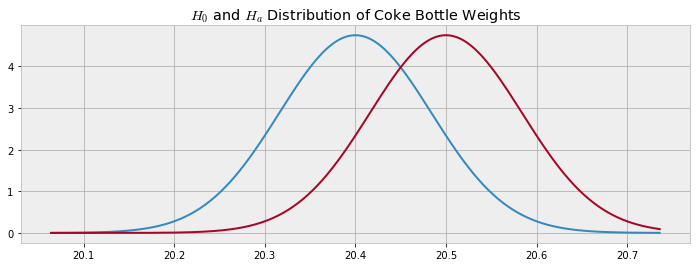

In [9]:
fig, ax = plt.subplots(figsize=(12, 4))

plot_coke_distributions(ax)

ax.set_title("$H_0$ and $H_a$ Distribution of Coke Bottle Weights")

### 7. Plot a vertical line to indicate the bounds for rejecting the null hypothesis assuming a significance level of 0.05. Based on the bounds for rejecting the null, what conclusion can we draw based on the sample of 130 bottles of Coca-Cola?

In [10]:
critical_value_right = h0_dist.ppf(1 - 0.025)
critical_value_left = h0_dist.ppf(0.025)

In [11]:
def plot_rejection_reigons(ax):
    t = np.linspace(20.4 - 4*coke_std_error, 20.4 + 4*coke_std_error, num=250)

    ax.axvline(critical_value_left, color="grey", linestyle="--")
    ax.axvline(critical_value_right, color="grey", linestyle="--")

    tpos = t[t >= critical_value_right]
    ax.fill_between(tpos, 0, h0_dist.pdf(tpos), 
                    color=color_cycle[0], alpha=0.2, label=r"$\alpha$")

    tneg = t[t <= critical_value_left]
    ax.fill_between(tneg, 0, h0_dist.pdf(tneg), 
                    color=color_cycle[0], alpha=0.2, label=r"$\alpha$")

Text(0.5,1,'$H_0$ and $H_a$ Distribution of Coke Bottle Weights')

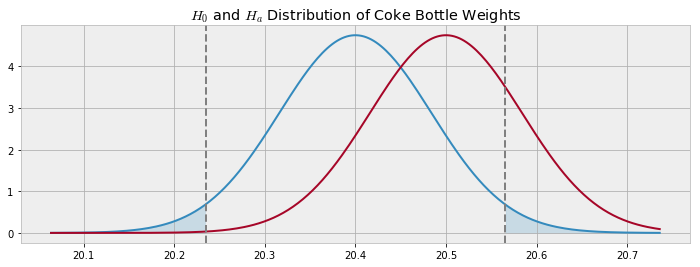

In [12]:
fig, ax = plt.subplots(figsize=(12, 4))

plot_coke_distributions(ax)
plot_rejection_reigons(ax)

ax.set_title("$H_0$ and $H_a$ Distribution of Coke Bottle Weights")

To see if we reject the null hypothesis, we just need to compute the sample mean and see if it lies in the rejection reigon.

In [13]:
print("Sample Mean of Coke Weights: {:2.2f}".format(coke_mean))

Sample Mean of Coke Weights: 20.52


Let's add a line to our plot for the sample mean.

Text(0.5,1,'$H_0$ and $H_a$ Distribution of Coke Bottle Weights')

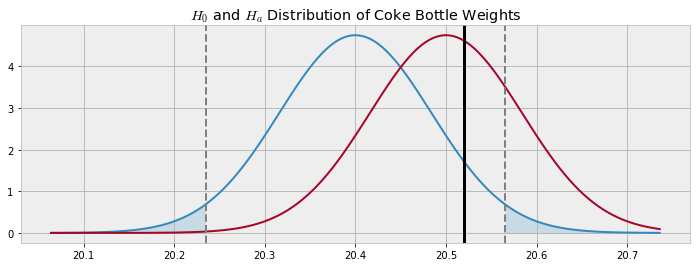

In [14]:
fig, ax = plt.subplots(figsize=(12, 4))

plot_coke_distributions(ax)
plot_rejection_reigons(ax)

ax.axvline(coke_mean, color='black', linewidth=3)

ax.set_title("$H_0$ and $H_a$ Distribution of Coke Bottle Weights")

Looks like we are outside of the rejection region, so we do not have sufficient evidence to reject the null hypothesis.

### 8. Build a 95% confidence interval based on the sample data. Does your interval suggest that the weight of a bottle of coke is different than 20.4 ounces? Explain what a false negative is in the context of this problem.



In [15]:
standard_critical_value = sts.norm().ppf(1 - 0.025)

left_endpoint = coke_mean - standard_critical_value*coke_std_error
right_endpoint = coke_mean + standard_critical_value*coke_std_error

print("95% Confidence Interval for Sample Mean: [{:2.2f}, {:2.2f}]".format(
    left_endpoint, right_endpoint))

95% Confidence Interval for Sample Mean: [20.36, 20.68]


There is a 95% chance that the true mean weight of coke bottles manufactured at our plant lies in this interval.  Since the interval contains the null assumption that $\mu_{\text{bottle weight}} = 20.4$, we cannot conclude from the confidence interval that the true mean weight is different than 20.4.

This finding is consistent with the conclusion form the NHST in part 7.

### 9. Compute the power of the test to detect that your process is manufacturing bottles which are, on average, overweight by 0.1 ounces. Shade the area under the alternate hypothesis distribution that indicates the power of the test.

The power is given by the area under the **alternate** distribution within the rejection region.

In [16]:
def plot_power_reigons(ax):
    t = np.linspace(20.4 - 4*coke_std_error, 20.4 + 4*coke_std_error, num=250)

    ax.axvline(critical_value_left, color="grey", linestyle="--")
    ax.axvline(critical_value_right, color="grey", linestyle="--")

    tpos = t[t >= critical_value_right]
    ax.fill_between(tpos, 0, ha_dist.pdf(tpos), 
                    color=color_cycle[1], alpha=0.2, label=r"$\alpha$")

    tneg = t[t <= critical_value_left]
    ax.fill_between(tneg, 0, ha_dist.pdf(tneg), 
                    color=color_cycle[1], alpha=0.2, label=r"$\alpha$")

Text(0.5,1,'$H_0$ and $H_a$ Distribution of Coke Bottle Weights')

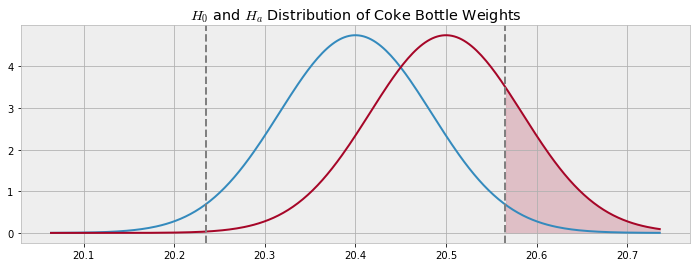

In [17]:
fig, ax = plt.subplots(figsize=(12, 4))

plot_coke_distributions(ax)
plot_power_reigons(ax)

ax.set_title("$H_0$ and $H_a$ Distribution of Coke Bottle Weights")

We can see that in this two tailed test, the leftmost tail contributes negligably to the power (its almost impossible to detect a negative effect when the true effect is positive.

In [18]:
power = ha_dist.cdf(critical_value_left) + (1 - ha_dist.cdf(critical_value_right))

print("Power to Detect Effect: {:2.2f}".format(power))

Power to Detect Effect: 0.22


There is a 22% chance we will detect a difference of 0.1 ounces, when such a difference actually exists.  This is quite an underpowered test!

## Part 2: Factors that Influence Power of a Test

### 1. Write a function compute_power that includes all the steps in Part 1. Test it by using it to re-compute the power from Part 1.

In [19]:
def compute_power_two_tailed(n, sigma, alpha, mu0, mua):
    """Compute the statistical power of a standard two-tailed z-test.

    Parameters
    ----------

    n: int
      Sample size.  Must be a positive number.

    sigma: float
      Population standard deviation.  Must be a positive number.

    alpha: float
      Significance level.  Must be between zero and one.

    mu0: float
      Assumed population mean under the null hypothesis.

    mua: float
      Assumed population mean under the alternate hypothesis.
    """
    standard_error = sigma / np.sqrt(n)
    h0_dist = sts.norm(loc=mu0, scale=standard_error)
    ha_dist = sts.norm(loc=mua, scale=standard_error)
    critical_values = [h0_dist.ppf(alpha/2), h0_dist.ppf(1 - alpha/2)]
    power = ha_dist.cdf(critical_values[0]) + (1 - ha_dist.cdf(critical_values[1]))
    return power

In [20]:
power = compute_power_two_tailed(
    130, np.std(coke_weights), 0.05, 20.4, 20.5)

print("Power to Detect Effect: {:2.2f}".format(power))

Power to Detect Effect: 0.22


### 2. Let's call the difference between mua and mu0 the hypothesized effect size, it is the size of an effect we would like our test to be able to detect. Make a plot of the hypothesized effect size vs. the power of the test.

In [21]:
effect_sizes = np.linspace(0, 0.5, num=100)
powers = [
    compute_power_two_tailed(
        130, np.std(coke_weights), 0.05, 20.4, 20.4 + es)
    for es in effect_sizes]

Text(0,0.5,'Power')

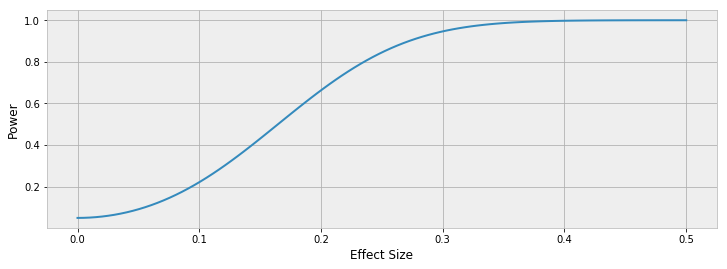

In [22]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(effect_sizes, powers)
ax.set_xlabel("Effect Size")
ax.set_ylabel("Power")

### 3. Without writing any code, explain why the standard error (i.e. standard deviation of the mean) decreases as the sample size increases. 

The variance of a sample mean can be computed using simple properties of the varaince operation (under the assumptions that the draws in the sample are independent and identically distributed).

$$ var \left( \frac{X_1 + X_2 + \cdots + X_n}{n} \right) = \frac{\sigma^2}{n} $$

This means that the standard deviation of a sample mean is

$$ sd \left( \frac{X_1 + X_2 + \cdots + X_n}{n} \right) = \frac{\sigma}{\sqrt{n}} $$

As the sample size gets larger, the $\sqrt{n}$ in the denominator grows, while the numerator stays constant.  This reduces the standard deviation of a sample.

Informally, when we use an i.i.d. sample to estimate a population mean, each individual draw is a weak estimator of the population mean.  Pooling together the independent draws allows us to combine information and gain more confidence.  This heightened confidence is what is being expressed in the calculation above.

### Furthermore, extrapolate and explain the relationship between sample size and power.

If we look at our image from before

Text(0.5,1,'$H_0$ and $H_a$ Distribution of Coke Bottle Weights')

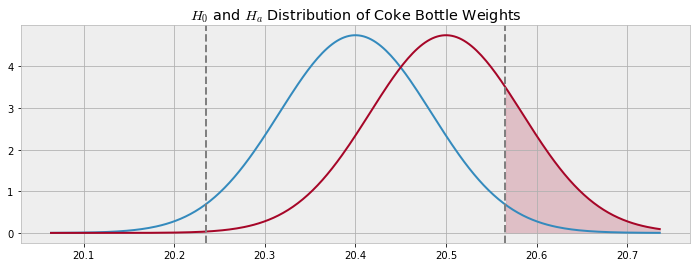

In [23]:
fig, ax = plt.subplots(figsize=(12, 4))

plot_coke_distributions(ax)
plot_power_reigons(ax)

ax.set_title("$H_0$ and $H_a$ Distribution of Coke Bottle Weights")

As the sample size increases, the variances of the two normal distributions will decrease, while they stay centered at the same place.  This means that the rejection thresholds will move towards the center of the null distribution.  Altogether, this will make the area of the red region larger - increasing the power of the test.

###  Verify your result by computing power on a larger dataset with 1000 data points (`numpy.loadtxt('data/coke_weights_1000.txt')`). Is the power higher or lower with a larger sample size given the effect size and significance level held constant?

In [24]:
coke_weights_large = np.loadtxt('./data/coke_weights_1000.txt')
print(coke_weights_large.shape)

(1000,)


In [25]:
power = compute_power_two_tailed(
    1000, np.std(coke_weights_large), 0.05, 20.4, 20.5)

print("Power From Larger Data Set: {:2.2f}".format(power))

Power From Larger Data Set: 0.90


### 4. How does the power change if the significance level is increased from 0.05 to 0.1. 

Again, referencing the picture, increasing the significance threshold will move the rejection region boundaries closer to the center of the blue region, increasing the area of the red region, and increasing the power.

In [26]:
power = compute_power_two_tailed(
    1000, np.std(coke_weights_large), 0.1, 20.4, 20.5)

print("Power From Larger Data Set: {:2.2f}".format(power))

Power From Larger Data Set: 0.94


### Explain your observation in terms of the increase/decrease probability of false positive/false negative. 

Increasing the significance level increases the probability of a false positive, but also increases the probability of a true positive.

### Plot significance level (over a range of 0.01 - 0.3) against power.

In [27]:
sig_levels = np.linspace(0.01, 0.3, num=100)

powers = [
    compute_power_two_tailed(
        1000, np.std(coke_weights_large), sig, 20.4, 20.5)
    for sig in sig_levels]

Text(0,0.5,'Power')

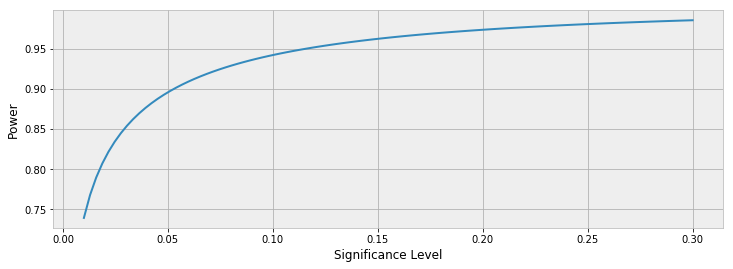

In [28]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(sig_levels, powers)
ax.set_xlabel("Significance Level")
ax.set_ylabel("Power")

## Part 3: Power Calculations for A/B testing

## Part 3.1: Computing Power for Pilot Sample

In [29]:
etsy_data = pd.read_csv('data/experiment.csv')
etsy_old_data = etsy_data[etsy_data['landing_page'] == 'old_page']['converted']
etsy_new_data = etsy_data[etsy_data['landing_page'] == 'new_page']['converted']

In [31]:
print("Conversion rate for old page: {:2.4f}".format(etsy_old_data.mean()))
print("Conversion rate for new page: {:2.4f}".format(etsy_new_data.mean()))

Conversion rate for old page: 0.0999
Conversion rate for new page: 0.0997


### 1. Compute the distribution of p_new - p_old under the null hypothesis (you will need to use the standard error of the actual data as the standard deviation of the sampling distribution).

As stated in the notes, we can estimate the standard error as

$$ SE = \sqrt{\frac{\hat p(1-\hat p)}{n_1} + \frac{\hat p (1 - \hat p)}{n_2}} $$

Under our null hypothesis

$$ H_0: p_{\text{new}} - p_{\text{old}} = 0.001 $$

The sampling distribution of the difference in proportions is

$$ \text{Difference in Sample Proportions} \mid H_0 \sim N \left( 0.001, \sqrt{\frac{\hat p(1-\hat p)}{n_1} + \frac{\hat p (1 - \hat p)}{n_2}} \right) $$

We can compute the standard error with a bit of python.

In [32]:
def standard_error_difference_in_proportions(n1, p1, n2, p2):
    p = (n1*p1 + n2*p2) / (n1 + n2)
    return np.sqrt((n1 + n2)*p*(1-p) / (n1*n2))

In [33]:
etsy_se = standard_error_difference_in_proportions(
    etsy_old_data.shape[0], etsy_old_data.mean(),
    etsy_new_data.shape[0], etsy_new_data.mean())
print("Difference in Proportions SE: {:2.4f}".format(etsy_se))

Difference in Proportions SE: 0.0014


So our null sampling distribution is

$$ \text{Difference in Sample Proportions} \mid H_0 \sim N \left( 0.001, 0.0014 \right) $$

### 2. Define a normal distribution random variable to represent your sampling distribution under the null hypothesis. Plot the PDF of the random variable as you have done previously.

In [34]:
h0_dist = sts.norm(loc=0.001, scale=etsy_se)

In [35]:
def plot_etsy_null_distribution(ax):
    t = np.linspace(0.001 - 4*etsy_se, 0.001 + 4*etsy_se, num=250)
    ax.plot(t, h0_dist.pdf(t))
    ax.axvline(0.001, color=color_cycle[0], linestyle="--", alpha=0.5)

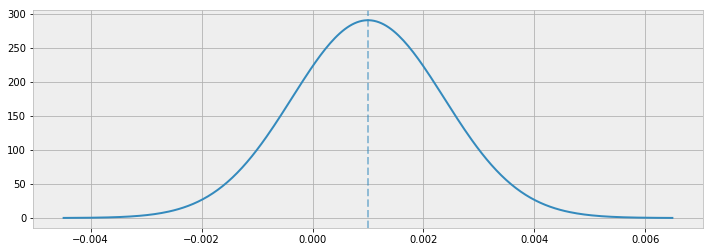

In [36]:
fig, ax = plt.subplots(figsize=(12, 4))

plot_etsy_null_distribution(ax)

### 3. Add a vertical line on the plot to indicate the bound for rejecting the null hypothesis given a significance level of 5% (not shown in plot below).

This is a one tailed test, so we only need a right rejection region.

In [37]:
critical_value = h0_dist.ppf(0.95)

In [38]:
def plot_etsy_right_rejection_reigon(ax, critical_value):
    ax.axvline(critical_value, color="grey", linestyle="--")
    
    t = np.linspace(0.001 - 4*etsy_se, 0.001 + 4*etsy_se, num=250)
    tpos = t[t >= critical_value]
    ax.fill_between(tpos, 0, h0_dist.pdf(tpos), 
                    color=color_cycle[0], alpha=0.2, label=r"$\alpha$")

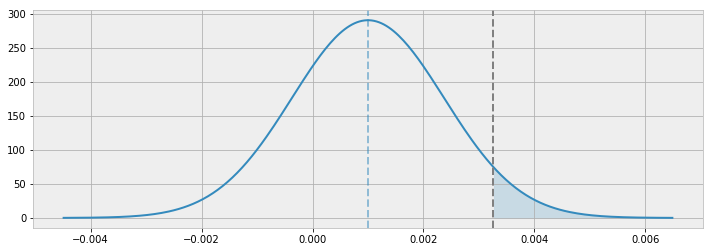

In [39]:
fig, ax = plt.subplots(figsize=(12, 4))

plot_etsy_null_distribution(ax)
plot_etsy_right_rejection_reigon(ax, critical_value)

### 4. Let's pretend we ran a pilot study to determine an estimated effect size. Suppose the data from the Etsy case study is what we collected. Use the difference in sample means from the data as the effect size for an alternate hypothesis. Compute this difference in sample means, and add another PDF plot showing the distribution under the alternate hypothesis.

In [40]:
etsy_difference_in_means = etsy_new_data.mean() - etsy_old_data.mean()

ha_dist = sts.norm(loc=etsy_difference_in_means, scale=etsy_se)

In [41]:
def plot_etsy_alternate_distribution(ax):
    t = np.linspace(0.001 - 4*etsy_se, 0.001 + 4*etsy_se, num=250)
    ax.plot(t, ha_dist.pdf(t))

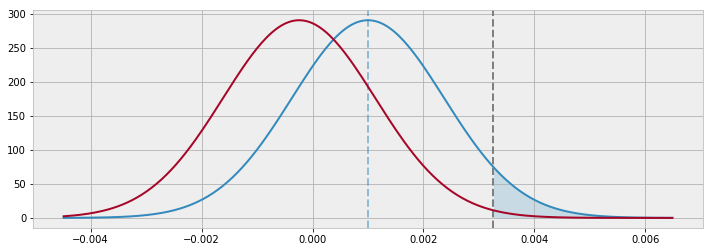

In [42]:
fig, ax = plt.subplots(figsize=(12, 4))

plot_etsy_null_distribution(ax)
plot_etsy_right_rejection_reigon(ax, critical_value)
plot_etsy_alternate_distribution(ax)

### 5. What problem do you spot here with the plot from 4?

The clear issue from the plot above is that our test is attempting to detect a **positive** effect, while our assumed effect size is **negative**.  It's should not be surprising, but a test designed to detect a positive effect has very little power to detect an effect in the opposite direction.

### Is increasing the sample size going to increase power?

No.  In fact, it will decrease the power.  We can picture the two distributions above narrowing as the sample size increases, which will pull more of the red distribution away from the critical region.

### If the effect size in the pilot is indeed representative of the ground truth, will the test ever be statistically significant?

Not often, and more and more rarely with larger datasets.

### Suggest what the next steps should be.

We have some weak evidence that the effect of implementing the new page is *negative*.  It may be wise for us to test this hypothesis.  If confirmed, we can move on to test other interventions, as we have proven this one to be destructive to our goals.

## Part 3.2: Computing Minimum Sample Size


### 1. Draw the usual diagram of null and alternate distributions with the rejection region for the test highlighted.

In [43]:
critical_value = h0_dist.ppf(0.05)

In [44]:
def plot_etsy_left_rejection_reigon(ax, critical_value):
    ax.axvline(critical_value, color="grey", linestyle="--")
    
    t = np.linspace(0.001 - 4*etsy_se, 0.001 + 4*etsy_se, num=250)
    tneg = t[t <= critical_value]
    ax.fill_between(tneg, 0, h0_dist.pdf(tneg), 
                    color=color_cycle[0], alpha=0.2, label=r"$\alpha$")

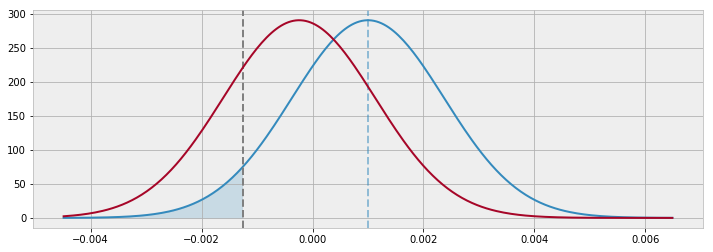

In [45]:
fig, ax = plt.subplots(figsize=(12, 4))

plot_etsy_null_distribution(ax)
plot_etsy_left_rejection_reigon(ax, critical_value)
plot_etsy_alternate_distribution(ax)

This test clearly has some power.  Good.

### 2. Write a function `calc_min_sample_size` that computes the minimum sample size needed to achieve a given power

In [46]:
def calc_minimum_sample_size(control_data, treatment_data, alpha, effect_size, power):
    """Calculate the minimum sample size for a z-test needed to achieve a given power.
    
    Parameters
    ----------
    
    control_data: array
      One dimensional array containing data from control group.
    
    treatment_data: array
      One dimensional array containing data from treatment group.
    
    alpha: float
      Desired significance level.  Must be between zero and one.
    
    effect_size: float
      Desired effect size to detect.
    
    power: float
      Desired power.  Must be between zero and one.
    
    Returns
    -------
    
    sample_size: int
      Minimum sample size to achieve a desired power.
    """
    standard_normal = sts.norm(0, 1)
    beta = 1 - power
    
    mu0 = control_data.mean()
    mua = treatment_data.mean()
    sigma = standard_error_difference_in_proportions(
        control_data.shape[0], mu0, treatment_data.shape[0], mua)
    
    numerator = sigma * (standard_normal.ppf(1 - alpha) - standard_normal.ppf(beta))
    denominator = mua - mu0
    return math.ceil((numerator / denominator) ** 2)

In [47]:
min_sample_size = calc_minimum_sample_size(
    etsy_old_data, etsy_new_data, 0.05, -0.001, 0.8)

In [48]:
print("Minimum Sample Size to Achieve 0.8 Power: {}".format(
    min_sample_size))

Minimum Sample Size to Achieve 0.8 Power: 201
